# Data Preparation for Machine Learning

## Part III: Data Cleaning

### Chapter 5: Basic Data Cleaning

#### Tutorial Overview
This chapter focuses on essential data cleaning steps that are foundational in any machine learning project. It is divided into seven main parts:
1. Messy Datasets
2. Identify Columns That Contain a Single Value
3. Delete Columns That Contain a Single Value
4. Consider Columns That Have Very Few Values
5. Remove Columns That Have A Low Variance
6. Identify Rows That Contain Duplicate Data
7. Delete Rows That Contain Duplicate Data

#### Identify Columns That Contain a Single Value

In [1]:
# summarize the number of unique values for each column using numpy

import numpy as np
import pandas as pd

# load the dataset
df = pd.read_csv('../Datasets/oil-spill.csv', header=None)
print(df.shape)

# summarize the number of unique values in each column
print(df.nunique())

(937, 50)
0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


#### Delete Columns That Contain a Single Value

In [2]:
# record columns to delete
to_del = [i for i, v in enumerate(df.nunique()) if v == 1]
print(to_del)

# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

[22]
(937, 49)


#### Consider Columns That Have Very Few Values
+ These columns may or may not contribute to the skill of a model. We can’t assume that they are useless to modeling.
+ Although near-zero variance predictors likely contain little valuable predictive information, we may not desire to filter these out.
+ Depending on the choice of data preparation and modeling algorithms, variables with very
few numerical values can also cause errors or unexpected results.

In [3]:
# summarize the number of unique values for each column using numpy

import numpy as np
import pandas as pd

# load the dataset
df = pd.read_csv('../Datasets/oil-spill.csv', header=None)
print(df.shape)

# summarize the number of unique values in each column
counts = df.nunique()
for i, v in enumerate(counts):
    print('%d, %d, %.2f%%' % (i, v, v / df.shape[0] * 100))

(937, 50)
0, 238, 25.40%
1, 297, 31.70%
2, 927, 98.93%
3, 933, 99.57%
4, 179, 19.10%
5, 375, 40.02%
6, 820, 87.51%
7, 618, 65.96%
8, 561, 59.87%
9, 57, 6.08%
10, 577, 61.58%
11, 59, 6.30%
12, 73, 7.79%
13, 107, 11.42%
14, 53, 5.66%
15, 91, 9.71%
16, 893, 95.30%
17, 810, 86.45%
18, 170, 18.14%
19, 53, 5.66%
20, 68, 7.26%
21, 9, 0.96%
22, 1, 0.11%
23, 92, 9.82%
24, 9, 0.96%
25, 8, 0.85%
26, 9, 0.96%
27, 308, 32.87%
28, 447, 47.71%
29, 392, 41.84%
30, 107, 11.42%
31, 42, 4.48%
32, 4, 0.43%
33, 45, 4.80%
34, 141, 15.05%
35, 110, 11.74%
36, 3, 0.32%
37, 758, 80.90%
38, 9, 0.96%
39, 9, 0.96%
40, 388, 41.41%
41, 220, 23.48%
42, 644, 68.73%
43, 649, 69.26%
44, 499, 53.26%
45, 2, 0.21%
46, 937, 100.00%
47, 169, 18.04%
48, 286, 30.52%
49, 2, 0.21%


In [4]:
# record columns to delete
to_del = [i for i, v in enumerate(counts) if (v / df.shape[0] * 100) < 1]
print(to_del)

# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


#### Remove Columns That Have A Low Variance
+ The variance can be used as a filter for identifying columns to be removed from the dataset. A column that has a single value has a variance of 0.0, and a column that has very few unique values may have a small variance.

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


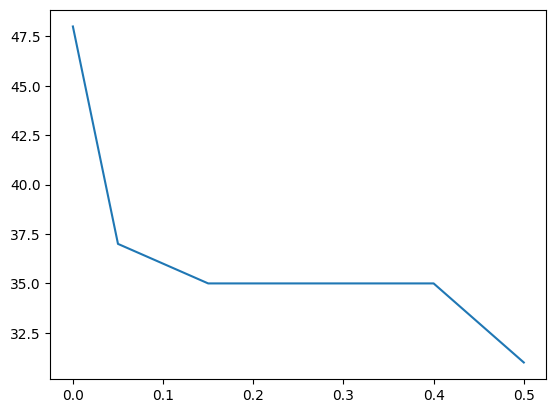

In [5]:
# explore the effect of the variance thresholds on the number of selected features

import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# load the dataset
df = pd.read_csv('../Datasets/oil-spill.csv', header=None)

# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

# apply transform with each threshold
results = list()

for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    
    # transform the input data
    X_sel = transform.fit_transform(X)
    
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    
    # store the result
    results.append(n_features)
    
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

#### Identify Rows That Contain Duplicate Data
+ From a probabilistic perspective, you can think of duplicate data as adjusting the priors for a class label or data distribution. This may help an algorithm like Naive Bayes if you wish to purposefully bias the priors.
+ Typically, this is not the case and machine learning algorithms will perform better by identifying and removing rows with duplicate data.
+ From an algorithm evaluation perspective, duplicate rows will result in misleading performance. 

In [6]:
# locate rows of duplicate data

import pandas as pd

# load the dataset
df = pd.read_csv('../Datasets/iris.csv', header=None)
print(df.shape)

# calculate duplicates
dups = df.duplicated()

# list all duplicate rows
df[dups]

(150, 5)


,0,1,2,3,4
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


#### Delete Rows That Contain Duplicate Data

In [7]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

### Chapter 6: Outlier Identification and Removal

#### Tutorial Overview
This chapter focuses on identifying and removing outliers from a dataset. It is divided into five main sections:
1. What are Outliers?
2. Standard Deviation Method
3. Interquartile Range Method
4. Automatic Outlier Detection

#### What are Outliers?
- Outliers can have many causes, such as:
    + Measurement or input error.
    + Data corruption.
    + True outlier observation.
- A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationship or pattern to the outliers.

#### Standard Deviation Method
+ If the data distribution is Gaussian, the standard deviation can be used to identify outliers. Outliers are typically defined as data points more than three standard deviations from the mean.

In [8]:
# identify outliers with standard deviation

import numpy as np
import pandas as pd

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
np.random.seed(1)

# generate univariate observations
data = 5 * np.random.randn(10000) + 50

# calculate summary statistics
data_mean, data_std = np.mean(data), np.std(data)

# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


+ You can use the same approach if you have multivariate data

#### Interquartile Range Method
+ The Interquartile Range (IQR) method is used for non-Gaussian distributions. The IQR is the difference between the 75th and 25th percentiles. Outliers are values below $Q1 - k \times IQR$ or above $Q3 + k \times IQR$
+ k typically is 1.5
+ Statistics-based outlier detection techniques assume that the normal data points would appear in high probability regions of a stochastic model, while outliers would occur in the low probability regions of a stochastic model.

In [9]:
import numpy as np

# calculate interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


+ The approach can be used for multivariate data by calculating the limits on each variable in the dataset in turn, and taking outliers as observations that fall outside of the rectangle or hyper-rectangle.

#### Automatic Outlier Detection
+ A simple approach to identifying outliers is to locate those examples that are far from the other examples in the multi-dimensional feature space.
+ This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of
features is increased.
+ The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier
detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers
based on the size of its local neighborhood. Those examples with the largest score are more
likely to be outliers.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# load the dataset
df = pd.read_csv('../Datasets/housing.csv', header=None)
data = df.values
X, y = data[:, :-1], data[:, -1]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


MAE: 3.356


### Chapter 7: How to Mark and Remove Missing Data

#### Tutorial Overview
This chapter focuses on handling missing data in machine learning datasets. It covers the following main parts:
1. Mark Missing Values
2. Missing Values Cause Problems
3. Remove Rows With Missing Values


#### Mark Missing Values
+ Most data has missing values, and the likelihood of having missing values increases with the size of the dataset.
+ Missing values are frequently indicated by out-of-range entries.
+ When a predictor is discrete in nature, missingness can be directly encoded into the predictor as if it were a naturally occurring category.
+ Missing Values can have many causes, such as:
    + often specific to the problem domain
    + corrupt measurements
    + data unavailability
    + changes in experimental design during data collection
    + collation of several similar but not identical datasets


In [11]:
# example of review data with missing values marked with a nan

import numpy as np
import pandas as pd

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)

# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

# summarize the first 20 rows of data
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

#### Missing Values Cause Problems
+ Missing values in a dataset can cause errors with some machine learning algorithms. For instance, the Linear Discriminant Analysis (LDA) algorithm cannot handle missing values.
+ Many popular predictive models such as support vector machines, the glmnet, and neural networks, cannot tolerate any amount of missing values.

#### Remove Rows With Missing Values
+ The simplest approach for dealing with missing values is to remove entire predictor(s) and/or sample(s) that contain missing values

In [12]:
# example of removing rows that contain missing values

import numpy as np
import pandas as pd

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)

# summarize the shape of the raw data
print(dataset.shape)

# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

# drop rows with missing values
dataset.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print(dataset.shape)

(768, 9)
(392, 9)


+ Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.

### Chapter 8: How to Use Statistical Imputation

#### Tutorial Overview
This tutorial is divided into three main parts:
+ Statistical Imputation
+ Statistical Imputation With SimpleImputer

#### Statistical Imputation
+ Statistical imputation involves using simple statistical techniques to estimate missing values.
+ Common techniques include:
    + Mean: Filling missing values with the mean of the column.
    + Median: Filling missing values with the median of the column.
    + Mode: Filling missing values with the most frequent value of the column.
    + Constant: Filling missing values with a fixed value.

In [13]:
# summarize the horse colic dataset

import pandas as pd

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, int(n_miss.iloc[0]), float(perc.iloc[0])))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


#### Statistical Imputation With SimpleImputer
+ The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation.

+ SimpleImputer Data Transform

In [14]:
# statistical imputation transform for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(np.isnan(X).flatten()))

# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


+ SimpleImputer and Model Evaluation

In [15]:
# evaluate mean imputation and random forest for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.866 (0.051)


+ Comparing Different Imputed Statistics

>mean 0.862 (0.046)
>median 0.870 (0.056)
>most_frequent 0.870 (0.055)
>constant 0.871 (0.049)


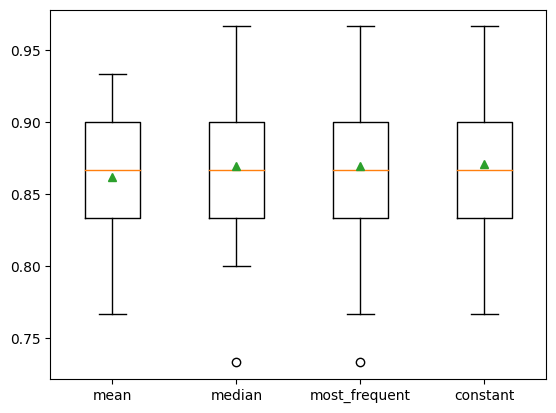

In [16]:
# compare statistical imputation strategies for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

+ SimpleImputer Transform When Making a Prediction

In [17]:
# constant imputation strategy and prediction for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


### Chapter 9: How to Use KNN Imputation

#### Tutorial Overview
This tutorial is divided into three parts:

+ k-Nearest Neighbor Imputation
+ Nearest Neighbor Imputation With KNNImputer

#### k-Nearest Neighbor Imputation
+ An effective approach to data imputing is to use a model to predict the missing values.
+ A model (KNN) is created for each feature that has missing values, taking as input values of perhaps all other input features.
+  A new sample is imputed by finding the samples in the training set “closest” to it and averages these nearby points to fill in the value.
+  Configuration of KNN imputation often involves selecting the distance measure (e.g. Euclidean) and the number of contributing neighbors for each prediction.  

#### Nearest Neighbor Imputation with KNNImputer

+ KNNImputer Data Transform
    +  The default distance measure is a Euclidean distance measure that is NaN aware

In [18]:
# knn imputation transform for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(np.isnan(X).flatten()))

# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


+ KNNImputer and Model Evaluation

In [19]:
# evaluate knn imputation and random forest for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.861 (0.055)


+ KNNImputer and Different Number of Neighbors
    + It is good practice to test a suite of different values for k.  

>1 0.863 (0.057)
>3 0.860 (0.058)
>5 0.860 (0.057)
>7 0.862 (0.054)
>9 0.858 (0.059)
>15 0.867 (0.056)
>18 0.857 (0.060)
>21 0.853 (0.058)


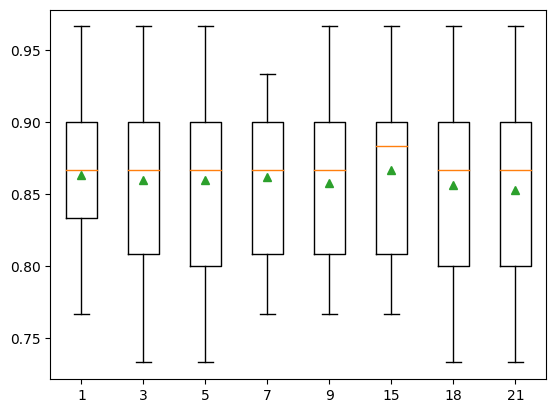

In [20]:
# compare knn imputation strategies for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1, 3, 5, 7, 9, 15, 18, 21]]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

+ KNNImputer Transform When Making a Prediction

In [21]:
# knn imputation strategy and prediction for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


### Chapter 10: How to Use Iterative Imputation

#### Tutorial Overview
The chapter is structured into three main parts:

+ Iterative Imputation
+ Iterative Imputation with IterativeImputer

#### Iterative Imputation
+ Iterative imputation models each feature with missing values as a function of other features in a regression-like manner. The process is repeated multiple times, allowing the imputed values to be refined iteratively.
+ Methodology:
    + Start with an initial imputation, such as mean imputation.
    + Use the initial imputed values to build a model to predict the missing values.
    + Iterate this process multiple times to refine the imputed values.
+ This approach can also be referred to as Fully Conditional Specification (FCS) or Multivariate Imputation by Chained Equations (MICE). A low number of iterations (10-20) is often sufficient.

#### Iterative Imputation With IterativeImputer

+ IterativeImputer Data Transform

In [22]:
# iterative imputation transform for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(np.isnan(X).flatten()))

# define imputer
imputer = IterativeImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


#### IterativeImputer and Model Evaluation

In [23]:
# evaluate iterative imputation and random forest for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.872 (0.054)


+ IterativeImputer and Different Imputation Order
    + ascending
    + descending
    + right-to-left (Arabic)
    + left-to-right (Roman)
    + random

>ascending 0.871 (0.057)
>descending 0.876 (0.050)
>roman 0.872 (0.052)
>arabic 0.872 (0.052)
>random 0.867 (0.054)


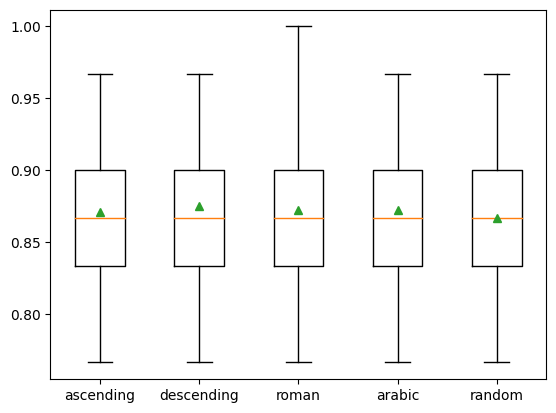

In [24]:
# compare iterative imputation strategies for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

+ IterativeImputer and Different Number of Iterations
    + It is possible that a large number of iterations may begin to bias or skew the estimate and that few iterations may be preferred. 

>1 0.876 (0.057)
>2 0.867 (0.051)
>3 0.871 (0.051)
>4 0.866 (0.058)
>5 0.873 (0.059)
>6 0.873 (0.054)
>7 0.868 (0.053)
>8 0.868 (0.053)
>9 0.869 (0.051)
>10 0.870 (0.051)
>11 0.869 (0.053)
>12 0.871 (0.051)
>13 0.878 (0.055)
>14 0.867 (0.054)
>15 0.867 (0.049)
>16 0.871 (0.055)
>17 0.864 (0.049)
>18 0.871 (0.054)
>19 0.870 (0.053)
>20 0.868 (0.047)


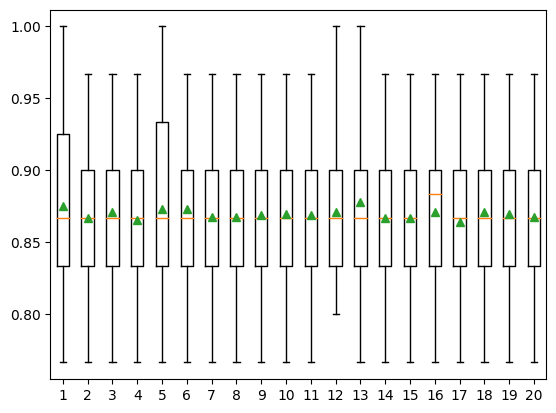

In [25]:
# compare iterative imputation number of iterations for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

+ IterativeImputer Transform When Making a Prediction

In [26]:
# iterative imputation strategy and prediction for the horse colic dataset

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv('../Datasets/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
